In [10]:
# Tools
import numpy as np 
import matplotlib.pyplot as plt 

In [11]:
# Implementation of objective from article 

class StrongConvexQuadraticFnc:
    """ 
    Strongly convex quadratic function 
    
        items = {
            matrix   : [list of matrices A], 
            vector   : [list of vectors b], 
            constant : [list of constant vectors c]
        }
    """

    def __init__(self, items):
        self.items = items
        self.num_fncs = len(items['matrix'])

    def mono(self, x, idx):
        return x @ self.items['matrix'][idx] @ x / 2 + self.items['vector'][idx] @ x + self.items['constant']
    
    def mono_grad(self, x, idx):
        return self.items['matrix'][idx] @ x + self.items['constant']
    
    def fnc(self, x, batch_idx):
        return np.sum([self.mono(x, idx) for idx in batch_idx]) / len(batch_idx)
    
    def grad(self, x, batch_idx):
        return np.sum([self.mono_grad(x, idx) for idx in batch_idx]) / len(batch_idx)



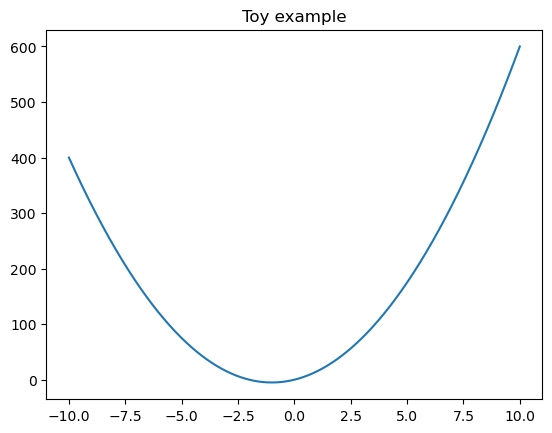

In [13]:
# 1-D Toy example 
num_fncs = 10
items = {
    'matrix'   : [np.array([[1]]) for _ in range(num_fncs)], 
    'vector'   : [np.array([1]) for _ in range(num_fncs)], 
    'constant' : [np.array([0]) for _ in range(num_fncs)] 
}

scq_fnc = StrongConvexQuadraticFnc(items)
X = np.linspace(-10, 10, 1000)
y = [scq_fnc.fnc(np.array([x]), np.arange(num_fncs)) for x in X]

plt.plot(X, y)
plt.title('Toy example')
plt.show()

In [14]:
from SGDWeighted import SGDWeighted

# set up 
alpha = 0.5
c = 1
M = 1
beta = 0.3
k_max = 100
x_init = np.array([10.0])

sgd_weighted = SGDWeighted(
    params=x_init, 
    grad=scq_fnc.grad, 
    step_alpha=alpha, 
    step_c=c, 
    step_M=M, 
    weight_beta=beta, 
    num_iterations=k_max, 
    num_fncs=num_fncs, 
    batch_size=1,  
)

x_minimizer = sgd_weighted.optimize()
print(x_minimizer)

[-0.0194231]
